# Explore

- `random_state`=123

Plan
- [x] Split data
- [x] Get Univariate Insights
- [ ] Get Bivariate Insights to target (quality)
    - scatterplots with quality on the y
    - correlations + heatmap
    - barplot, swarmplot, and/or boxplot with quality on y and color on x

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import seaborn as sns

import sys
import os
home_directory_path = os.path.expanduser('~')
sys.path.append(home_directory_path +'/utils')

from wrangle import split_data

import explore_utils as e

from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans

from itertools import combinations
import wrangle as w

In [11]:
import warnings
warnings.filterwarnings("ignore")

Acquire and split data

In [12]:
df = pd.read_csv('wine_data.csv') 

train, validate, test = split_data(df, validate_size=.15, test_size=.15, 
                         stratify_col='red', random_state=123)

In [13]:
train.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'red'],
      dtype='object')

**Univariate Analysis**

Notes:
- `color`: 75/25, white/red whine
- `quality`: quality is approximately normal. scores of 3 and 9 are rare. 92% have scores 5-7. 44% have a score of 6

QUALITY


,quality,Count,Frequency
0,6,1618,0.434479
1,5,1234,0.331364
2,7,602,0.161654
3,4,141,0.037863
4,8,103,0.027658
5,3,21,0.005639
6,9,5,0.001343


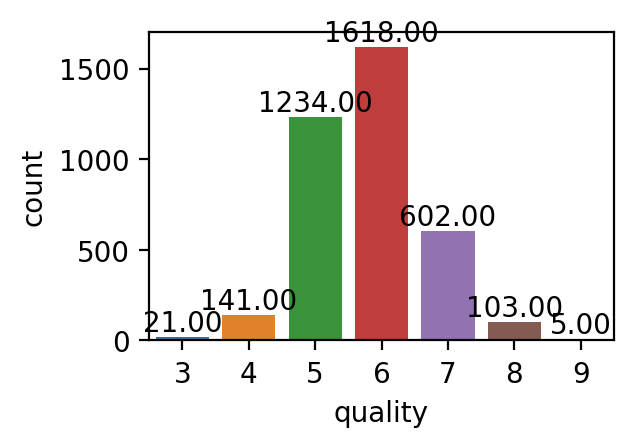


RED


,red,Count,Frequency
0,0,2773,0.744629
1,1,951,0.255371


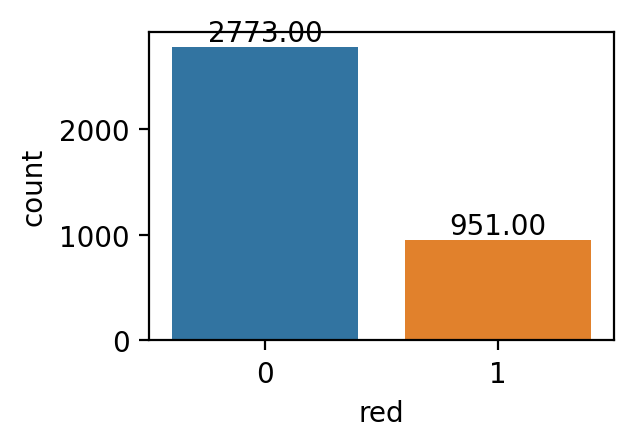

In [14]:
e.explore_univariate_categorical_cols(train)

Descriptive Stats:



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000
mean,7.217817,0.343875,0.319809,5.107573,0.056710,30.273765,114.352175,0.994545,3.223929,0.532095,10.559505
std,1.299863,0.167746,0.147882,4.528487,0.037282,17.851043,56.400407,0.002972,0.159772,0.146899,1.181230
min,3.800000,0.090000,0.000000,0.700000,0.012000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,75.000000,0.992260,3.120000,0.430000,9.500000
50%,7.000000,0.300000,0.310000,2.800000,0.047000,28.000000,117.000000,0.994695,3.210000,0.510000,10.400000
75%,7.700000,0.410000,0.400000,7.600000,0.066000,41.000000,153.000000,0.996792,3.320000,0.600000,11.400000
max,15.600000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,1.950000,14.050000


------------------------------------------------------------ 
 FIXED ACIDITY 

Most Frequent Values:
6.8    195
6.6    192
6.4    166
Name: fixed acidity, dtype: int64


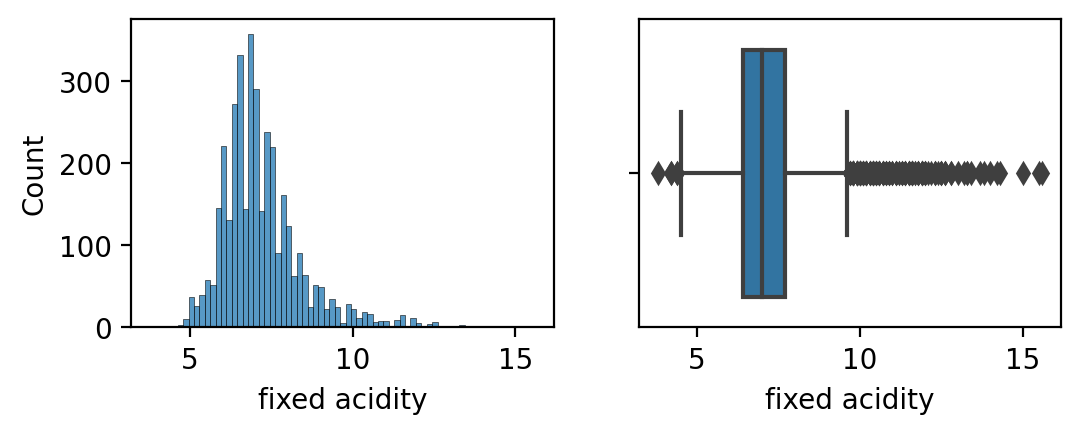


------------------------------------------------------------ 
 VOLATILE ACIDITY 

Most Frequent Values:
0.28    172
0.26    156
0.24    155
Name: volatile acidity, dtype: int64


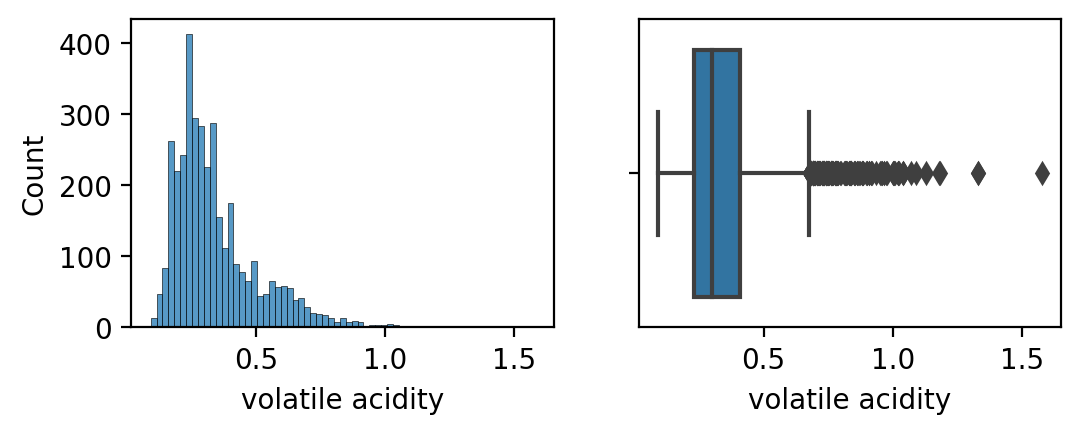


------------------------------------------------------------ 
 CITRIC ACID 

Most Frequent Values:
0.30    183
0.32    172
0.28    169
Name: citric acid, dtype: int64


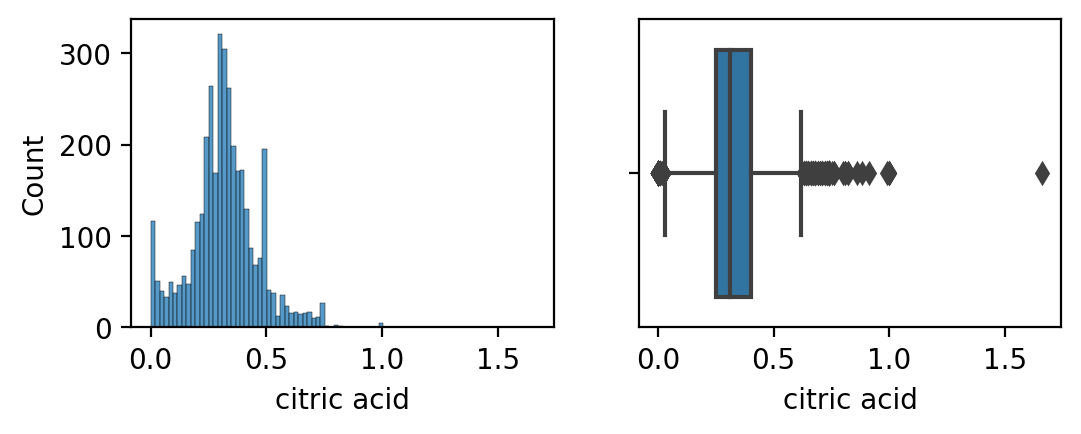


------------------------------------------------------------ 
 RESIDUAL SUGAR 

Most Frequent Values:
1.8    150
1.6    142
2.0    139
Name: residual sugar, dtype: int64


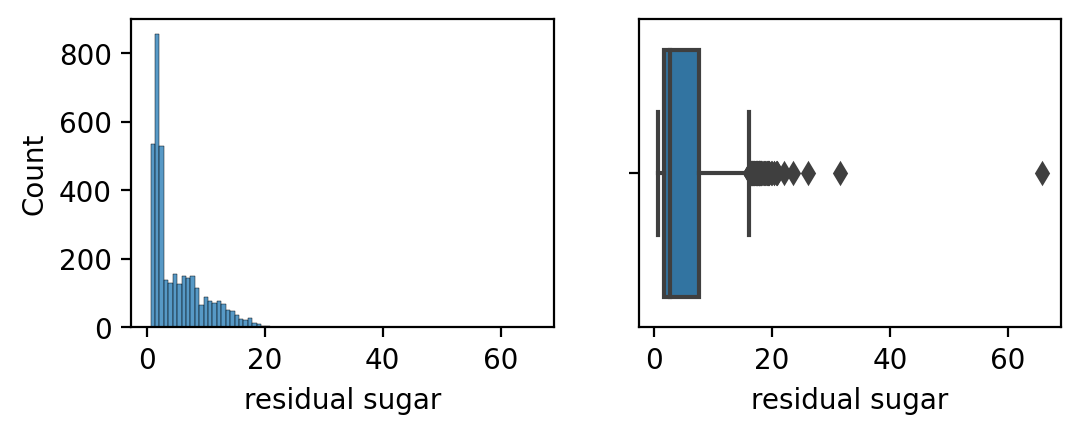


------------------------------------------------------------ 
 CHLORIDES 

Most Frequent Values:
0.036    116
0.042    113
0.044    110
Name: chlorides, dtype: int64


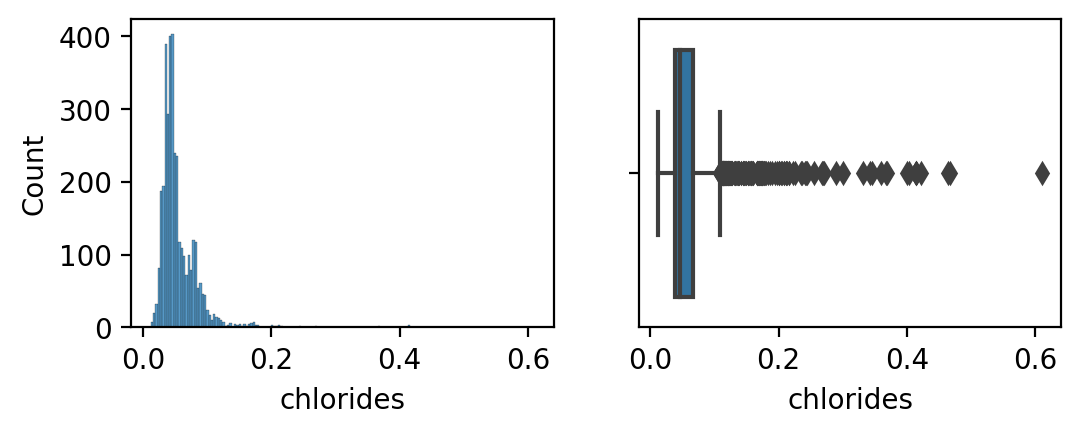


------------------------------------------------------------ 
 FREE SULFUR DIOXIDE 

Most Frequent Values:
6.0     105
29.0    102
15.0     95
Name: free sulfur dioxide, dtype: int64


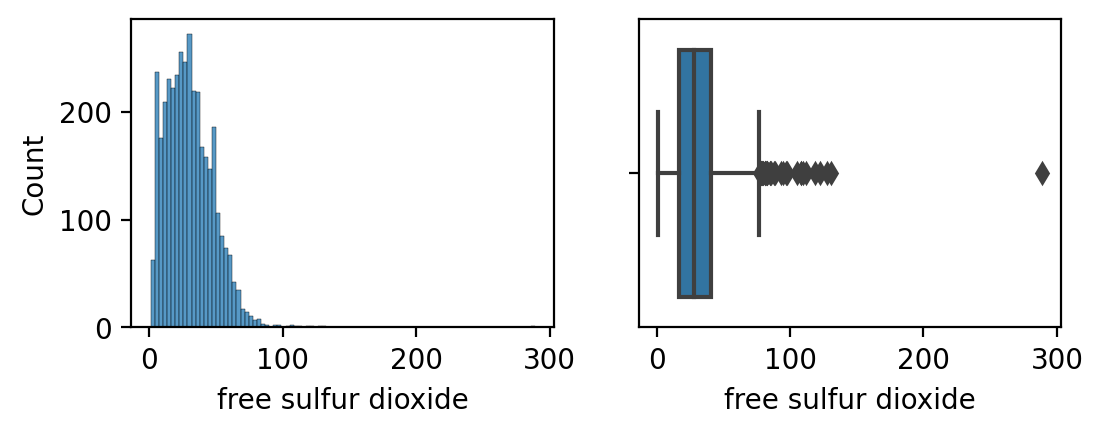


------------------------------------------------------------ 
 TOTAL SULFUR DIOXIDE 

Most Frequent Values:
117.0    37
113.0    37
111.0    37
Name: total sulfur dioxide, dtype: int64


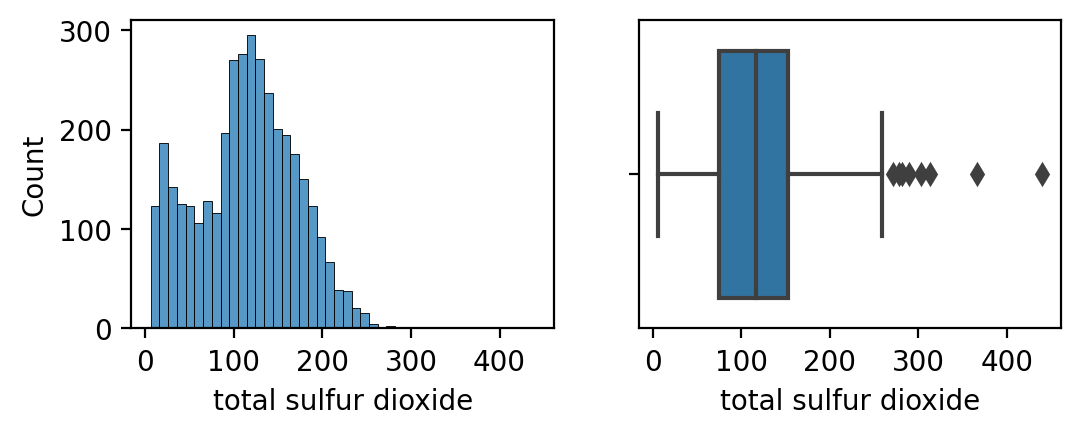


------------------------------------------------------------ 
 DENSITY 

Most Frequent Values:
0.9968    44
0.9920    43
0.9928    40
Name: density, dtype: int64


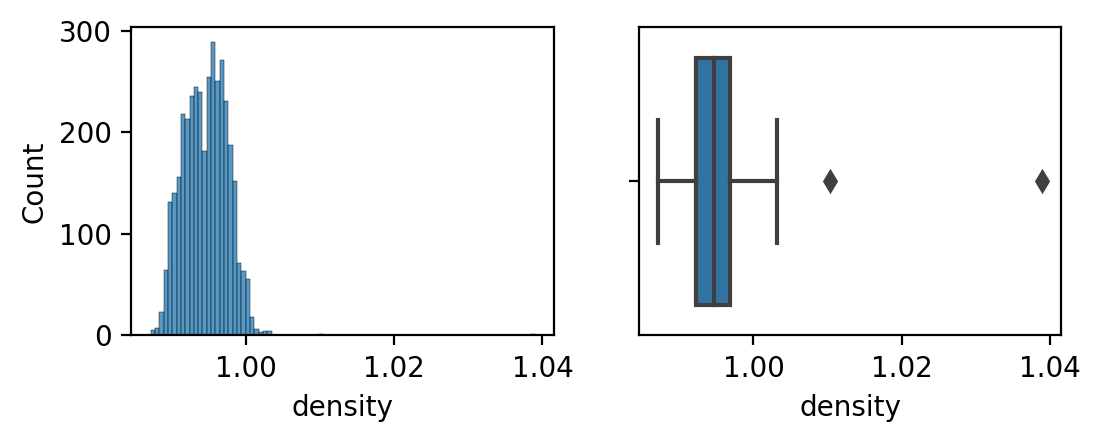


------------------------------------------------------------ 
 PH 

Most Frequent Values:
3.16    120
3.22    115
3.14    103
Name: pH, dtype: int64


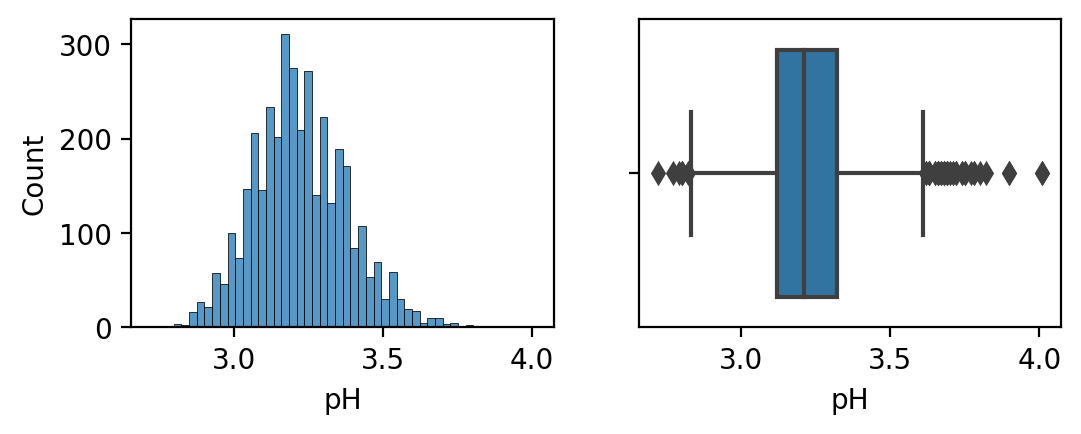


------------------------------------------------------------ 
 SULPHATES 

Most Frequent Values:
0.54    144
0.50    140
0.46    131
Name: sulphates, dtype: int64


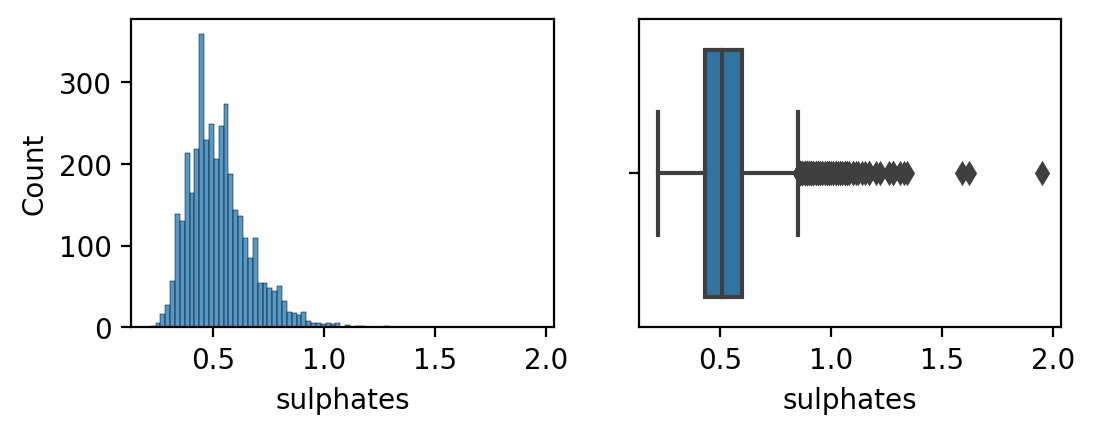


------------------------------------------------------------ 
 ALCOHOL 

Most Frequent Values:
9.5     206
9.4     183
10.0    153
Name: alcohol, dtype: int64


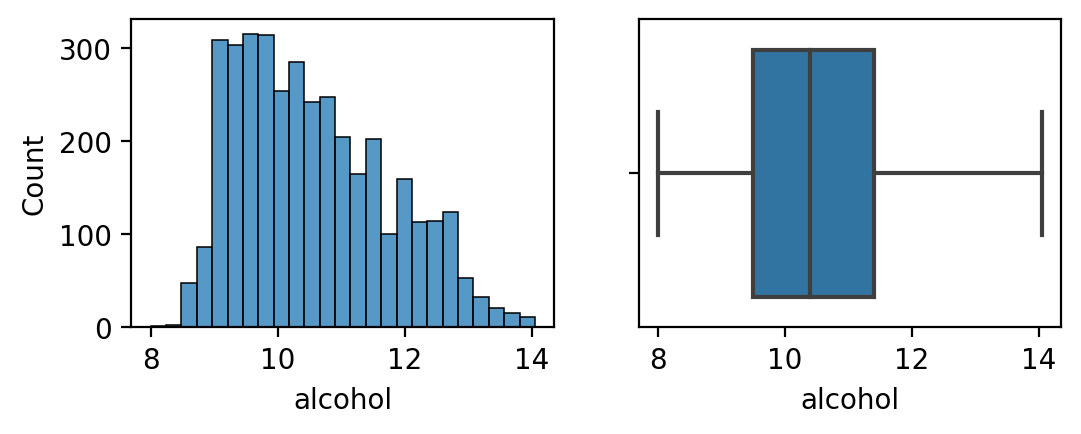

In [15]:
e.explore_univariate_continuous_cols(train)

**Bivariate Analysis**

- color of the wine seems independent of quality
- Features that drive quality: $r > .2$
    - `['alcohol', 'density', 'volatile acidity', 'chlorides' ]`
- Features that don't drive quality: $r < .1$
    - `['color', 'fixed acidity', 'citric acid', 'residual sugar',
        'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'sulphates']`, 

red group quality stats


red,0,1
count,2773.000000,951.000000
mean,5.854670,5.628812
std,0.888526,0.838527
min,3.000000,3.000000
25%,5.000000,5.000000
50%,6.000000,6.000000
75%,6.000000,6.000000
max,9.000000,8.000000


red group quality averages


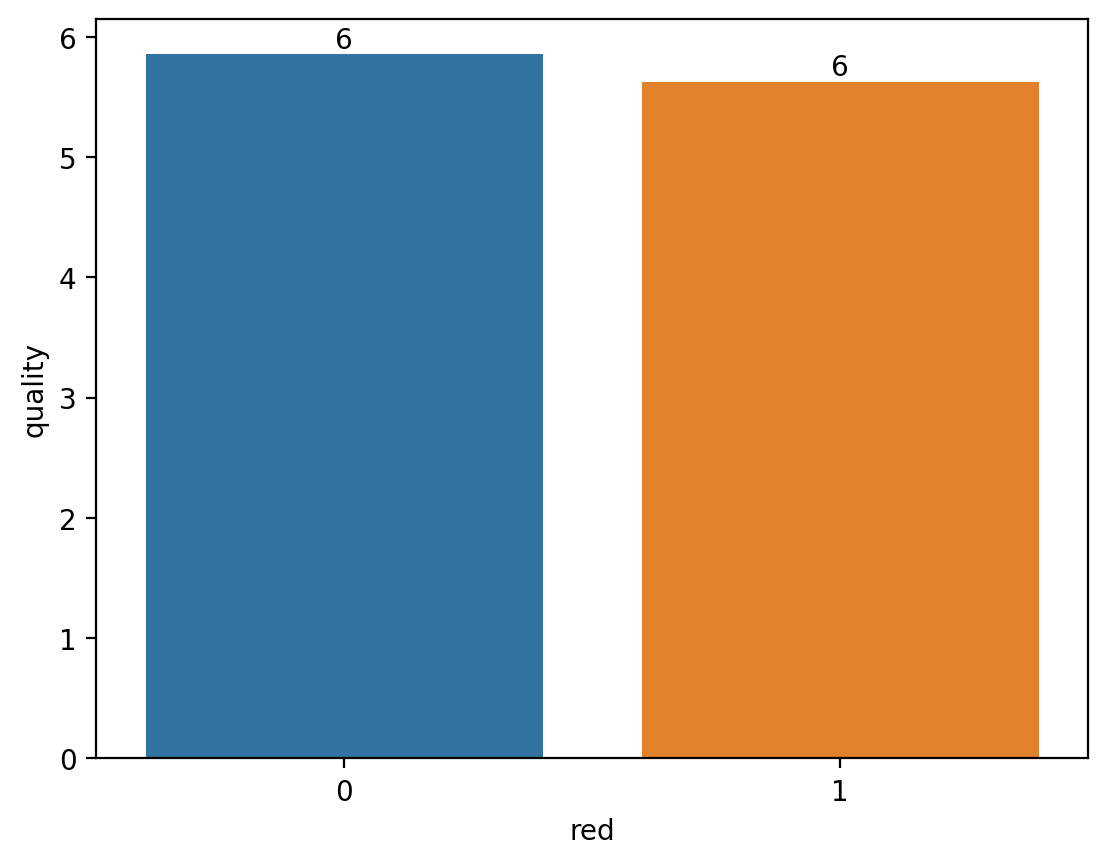

red group quality distributions


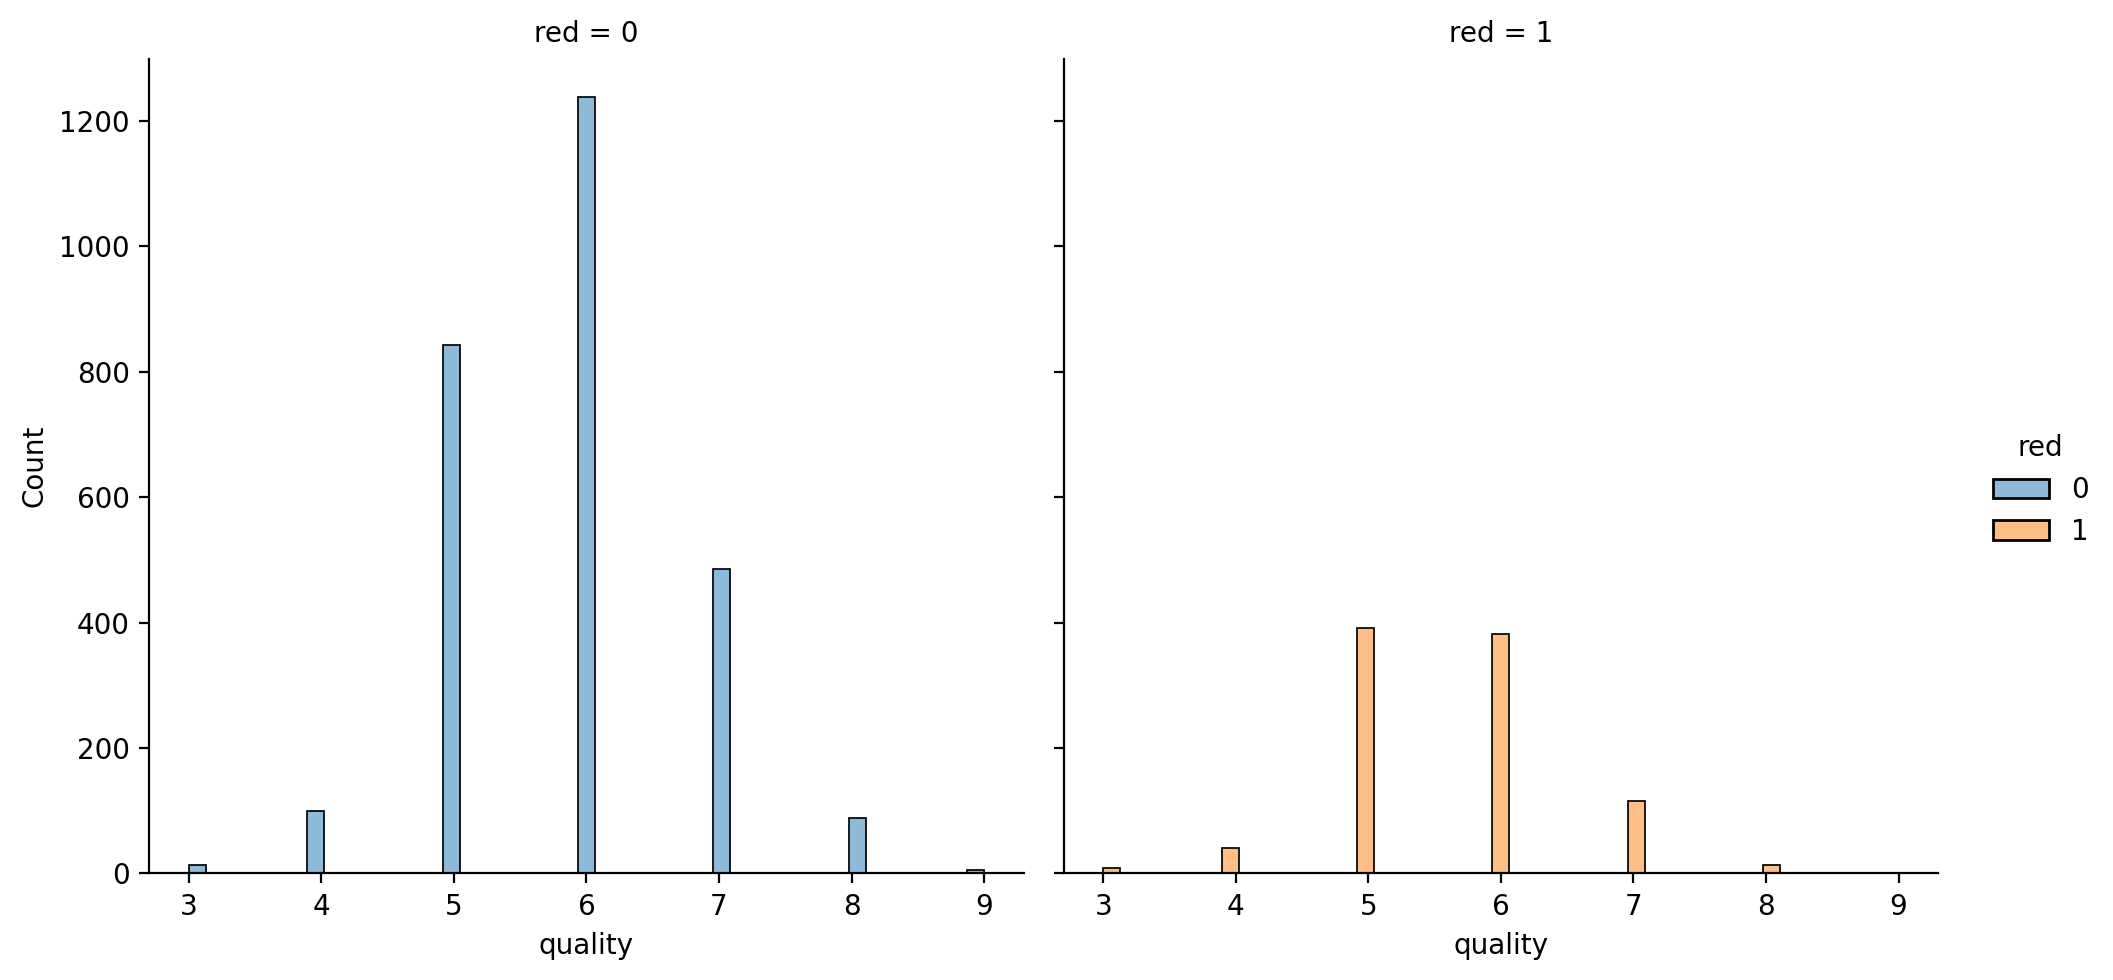

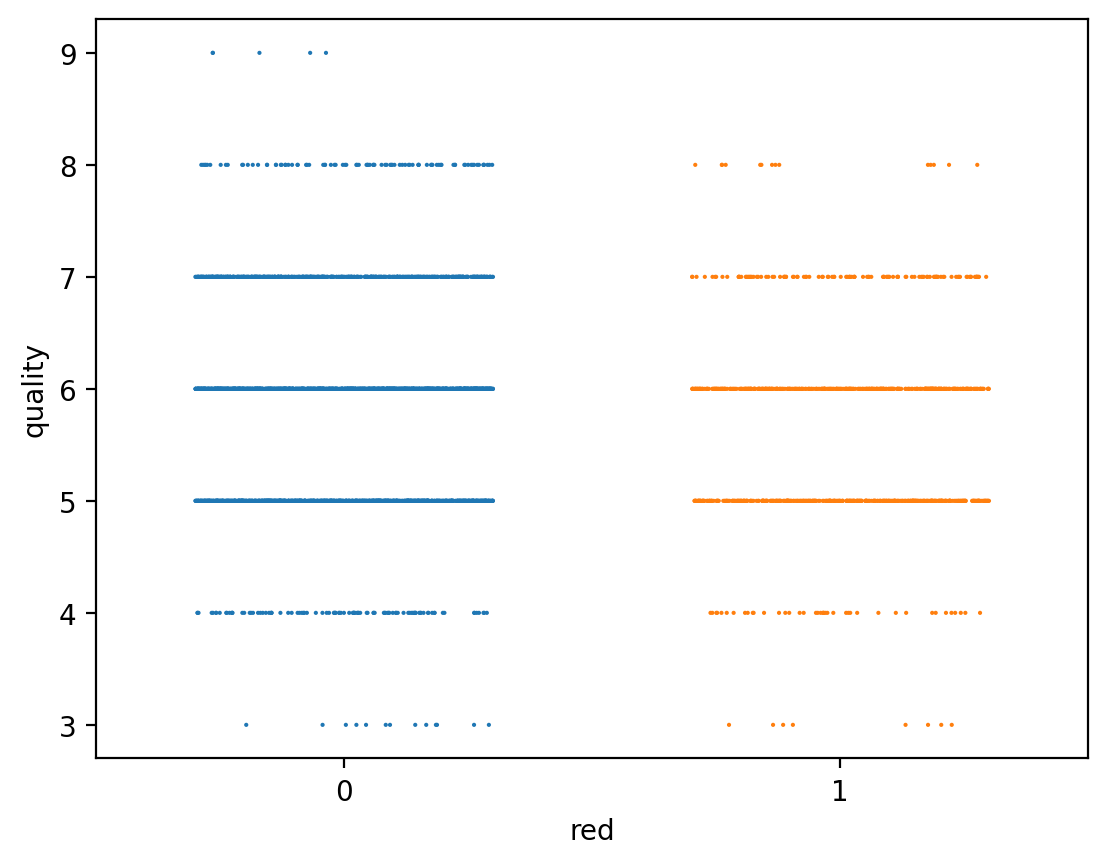

red group quality boxplots


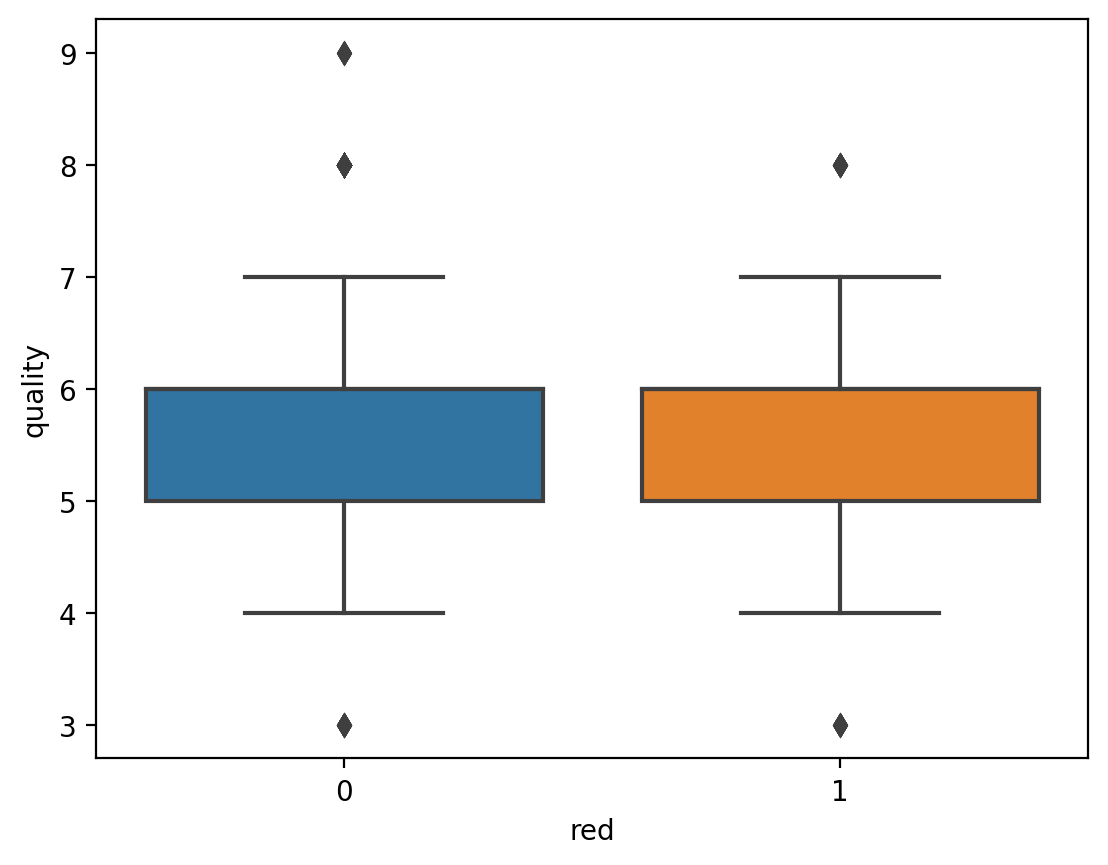

In [16]:
e.explore_bivariate_cat_to_cont_target(train, target='quality',
                                       cat_cols=['red'])

In [17]:
# e.explore_bivariate_cont_to_cont_target(train, target='quality',
#                                         cont_cols=e.get_cat_and_cont_cols(train)[1] + ['quality'])

**Clustering**

Find clusters/groups from strong features

In [18]:
scaler = MinMaxScaler()

Scale Training data

In [52]:
pd.DataFrame(data=scaler.fit_transform(train.drop(columns=['quality'])),
             columns=train.drop(columns=['quality']).columns)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,red,clusters_1,clusters_2,clusters_3
0,0.211864,0.080537,0.168675,0.012289,0.065109,0.156250,0.313364,0.109697,0.395349,0.115607,0.347107,0.0,0.000000,0.333333,1.000000
1,0.237288,0.114094,0.144578,0.099846,0.043406,0.093750,0.301843,0.155967,0.488372,0.219653,0.396694,0.0,0.666667,0.666667,0.333333
2,0.355932,0.140940,0.379518,0.013825,0.115192,0.052083,0.052995,0.169077,0.449612,0.323699,0.462810,1.0,0.666667,0.666667,0.333333
3,0.347458,0.073826,0.295181,0.013825,0.068447,0.048611,0.317972,0.113553,0.341085,0.144509,0.413223,0.0,0.666667,0.666667,0.333333
4,0.127119,0.093960,0.337349,0.003072,0.048414,0.156250,0.311060,0.078658,0.341085,0.231214,0.280992,0.0,0.000000,0.333333,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3719,0.466102,0.187919,0.265060,0.013825,0.043406,0.069444,0.082949,0.157124,0.403101,0.341040,0.462810,1.0,0.333333,1.000000,0.333333
3720,0.220339,0.147651,0.234940,0.104455,0.046745,0.194444,0.476959,0.147291,0.465116,0.121387,0.330579,0.0,0.000000,0.333333,0.000000
3721,0.279661,0.181208,0.144578,0.016897,0.021703,0.107639,0.221198,0.061500,0.480620,0.213873,0.793388,0.0,1.000000,0.000000,0.666667
3722,0.237288,0.107383,0.210843,0.033794,0.036728,0.128472,0.264977,0.057259,0.364341,0.104046,0.793388,0.0,1.000000,0.000000,0.666667


In [51]:
train_sc = pd.concat([pd.DataFrame(data=scaler.fit_transform(train.drop(columns=['quality'])),
                                   columns=train.drop(columns=['quality']).columns),
                      train[['quality']].reset_index().iloc[:,1]],
                      axis=1)

In [20]:
train_sc.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,red,quality
0,0.211864,0.080537,0.168675,0.012289,0.065109,0.156250,0.313364,0.109697,0.395349,0.115607,0.347107,0.0,6
1,0.237288,0.114094,0.144578,0.099846,0.043406,0.093750,0.301843,0.155967,0.488372,0.219653,0.396694,0.0,6
2,0.355932,0.140940,0.379518,0.013825,0.115192,0.052083,0.052995,0.169077,0.449612,0.323699,0.462810,1.0,6
3,0.347458,0.073826,0.295181,0.013825,0.068447,0.048611,0.317972,0.113553,0.341085,0.144509,0.413223,0.0,5
4,0.127119,0.093960,0.337349,0.003072,0.048414,0.156250,0.311060,0.078658,0.341085,0.231214,0.280992,0.0,5


In [21]:
validate_sc = pd.concat([pd.DataFrame(data=scaler.transform(validate.drop(columns=['quality'])),
                                   columns=validate.drop(columns=['quality']).columns),
                         validate[['quality']].reset_index().iloc[:,1]],
                         axis=1)

In [22]:
validate_sc.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,red,quality
0,0.228814,0.352349,0.000000,0.018433,0.088481,0.027778,0.027650,0.194525,0.573643,0.248555,0.198347,1.0,5
1,0.211864,0.281879,0.078313,0.024578,0.106845,0.097222,0.078341,0.166377,0.542636,0.306358,0.495868,1.0,6
2,0.279661,0.026846,0.174699,0.227343,0.086811,0.190972,0.252304,0.197802,0.341085,0.109827,0.280992,0.0,7
3,0.313559,0.221477,0.271084,0.129032,0.028381,0.065972,0.274194,0.171390,0.310078,0.080925,0.347107,0.0,6
4,0.254237,0.087248,0.222892,0.222734,0.065109,0.232639,0.396313,0.235975,0.527132,0.364162,0.214876,0.0,6


In [23]:
test_sc = pd.concat([pd.DataFrame(data=scaler.transform(test.drop(columns=['quality'])),
                                   columns=test.drop(columns=['quality']).columns),
                     test[['quality']].reset_index().iloc[:,1]],
                     axis=1)

In [24]:
test_sc.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,red,quality
0,0.288136,0.241611,0.090361,0.019969,0.110184,0.031250,0.050691,0.173125,0.441860,0.167630,0.314050,1.0,6
1,0.254237,0.073826,0.355422,0.003072,0.225376,0.128472,0.290323,0.113553,0.255814,0.092486,0.181818,0.0,6
2,0.220339,0.161074,0.265060,0.125960,0.071786,0.177083,0.364055,0.149798,0.294574,0.150289,0.264463,0.0,5
3,0.220339,0.315436,0.090361,0.016897,0.110184,0.055556,0.135945,0.112396,0.472868,0.219653,0.413223,1.0,6
4,0.279661,0.046980,0.265060,0.027650,0.093489,0.055556,0.057604,0.118951,0.488372,0.184971,0.727273,1.0,6


In [25]:
# plt.figure(figsize=(40,20))

# sns.pairplot(data=train_sc, corner=True,
#              hue='quality', plot_kws={'s': 3, 'alpha': .1})

**Cluster**

- `['alcohol', 'volatile acidity', 'chlorides']`
- `[‘alcohol', ‘density’, 'citric acid’]`
- `[‘alcohol', ‘sugar, ‘ph’]`
- `['Total sulfur dioxide', 'density']`

Cluster on combination of 2 features

In [26]:
len(list(combinations(train_sc.columns, 2)))

78

How well can we cluster off 2 features?
- lower inertia means we have denser clusters
- **Note:** this doesn't tell us how useful these clusters will be at predicting quality.

In [27]:
# for combo in [list(tup) for tup in list(combinations(train_sc.columns, 2))]:
#     print('-'*20)
#     print(combo)
#     plt.figure(figsize=(4, 3))
#     pd.Series({k: KMeans(k).fit(train_sc[combo]).inertia_ for k in range(2, 12)}).plot(marker='x')
#     plt.xticks(range(2, 12))
#     plt.xlabel('k')
#     plt.ylabel('inertia')
#     plt.title('Change in inertia as k increases')
#     plt.show()

Cluster on combination of 3 features

In [28]:
len(list(combinations(train_sc.columns, 3)))

286

How well can we cluster off 3 features?
- lower inertia means we have denser clusters
- **Note:** this doesn't tell us how useful these clusters will be at predicting quality.

In [29]:
# for combo in [list(tup) for tup in list(combinations(train_sc.columns, 3))]:
#     print('-'*20)
#     print(combo)
#     plt.figure(figsize=(4, 3))
#     pd.Series({k: KMeans(k).fit(train_sc[combo]).inertia_ for k in range(2, 12)}).plot(marker='x')
#     plt.xticks(range(2, 12))
#     plt.xlabel('k')
#     plt.ylabel('inertia')
#     plt.title('Change in inertia as k increases')
#     plt.show()

Cluster group 1:

- 4 clusters off `['fixed acidity', 'chlorides', 'alcohol']`

In [39]:
feats1 = ['fixed acidity', 'chlorides', 'alcohol']

kmeans1 = KMeans(n_clusters=4, random_state=123).fit(train_sc[feats1])

train['clusters_1'] = kmeans1.predict(train_sc[feats1])
validate['clusters_1'] = kmeans1.predict(validate_sc[feats1])
test['clusters_1'] = kmeans1.predict(test_sc[feats1])

Cluster group 2:

- 4 clusters off `['fixed acidity', 'alcohol']`

In [31]:
feats2 = ['fixed acidity', 'alcohol']

kmeans2 = KMeans(n_clusters=4, random_state=123).fit(train_sc[feats2])

train['clusters_2'] = kmeans2.predict(train_sc[feats2])
validate['clusters_2'] = kmeans2.predict(validate_sc[feats2])
test['clusters_2'] = kmeans2.predict(test_sc[feats2])

Cluster group 3:

- 4 clusters off `['free sulfur dioxide', 'residual sugar', 'alcohol']`

In [32]:
feats3 = ['free sulfur dioxide', 'residual sugar', 'alcohol']

kmeans3 = KMeans(n_clusters=4, random_state=123).fit(train_sc[feats3])

train['clusters_3'] = kmeans3.predict(train_sc[feats3])
validate['clusters_3'] = kmeans3.predict(validate_sc[feats3])
test['clusters_3'] = kmeans3.predict(test_sc[feats3])

In [33]:
train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red,clusters_1,clusters_2,clusters_3
3048,6.3,0.21,0.28,1.5,0.051,46.0,142.0,0.99280,3.23,0.42,10.1,6,0,0,1,3
4302,6.6,0.26,0.24,7.2,0.038,28.0,137.0,0.99520,3.35,0.60,10.4,6,0,2,2,1
1338,8.0,0.30,0.63,1.6,0.081,16.0,29.0,0.99588,3.30,0.78,10.8,6,1,2,2,1
2634,7.9,0.20,0.49,1.6,0.053,15.0,144.0,0.99300,3.16,0.47,10.5,5,0,2,2,1
4670,5.3,0.23,0.56,0.9,0.041,46.0,141.0,0.99119,3.16,0.62,9.7,5,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,9.3,0.37,0.44,1.6,0.038,21.0,42.0,0.99526,3.24,0.81,10.8,7,1,2,3,1
1959,6.4,0.31,0.39,7.5,0.040,57.0,213.0,0.99475,3.32,0.43,10.0,5,0,0,1,0
2665,7.1,0.36,0.24,1.8,0.025,32.0,102.0,0.99030,3.34,0.59,12.8,6,0,1,0,2
3931,6.6,0.25,0.35,2.9,0.034,38.0,121.0,0.99008,3.19,0.40,12.8,6,0,1,0,2


Save new cluster features onto the original data

In [40]:
df = pd.concat([train, validate, test]).sort_index()
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red,clusters_1,clusters_2,clusters_3
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,0,1,3
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,0,1,3
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1,0,1,3
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1,1,3,3
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1,0,1,3


In [41]:
df['clusters_1'].value_counts()

0    2098
2    1691
3    1028
1     503
Name: clusters_1, dtype: int64

In [44]:
df.to_csv('wine_data_model.csv', index=False)